In [ ]:
import pandas as pd

# **Load** **and** **inspect**

In [ ]:
df=pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Checking for the missing values and filling it**

In [ ]:
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


we have missing values for the columns name, host_name, last_review and reviews_per_month.
We'll first drop the rows of name which has the missing values

In [ ]:
df.dropna(subset=['name'],inplace=True)

In [ ]:
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df.dropna(subset=['host_name'],inplace=True)
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Filling the missing values of reviews_per_month with 0

In [ ]:
df['reviews_per_month'].fillna(0, inplace=True)

/tmp/ipython-input-1792330394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


dropping the entire last_review column

In [ ]:
df.drop('last_review', axis=1, inplace=True)

In [ ]:
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


we have dealt with the missing values

# **Outlier detection and handling**

visualizing the price column using box plot to detect outliers

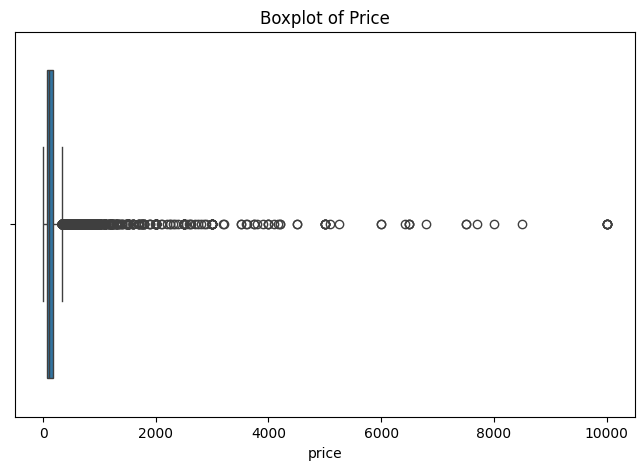

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price")
plt.show()


calculating first quartile, third quartile and IQR

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 69.0
Q3: 175.0
IQR: 106.0


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -90.0
Upper Bound: 334.0


In [ ]:
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)

Original shape: (48858, 15)
Cleaned shape: (45887, 15)


# Handling inconsistencies(like leading/trailing spaces, inconsistent capitalization)
for leading/ trailing spaces and to replace multiple spaces with a single space
df['name'] = df['name'].str.strip().str.replace(r'\s+', ' ', regex=True)
df['host_name'] = df['host_name'].str.strip().str.replace(r'\s+', ' ', regex=True)
and for standardizing captilization
df['host_name'] = df['host_name'].str.title()



# **Problem Statement 2: Central Tendency and Visualization**

In [ ]:
# Mean
price_mean = df_clean['price'].mean()
reviews_mean = df_clean['number_of_reviews'].mean()

#median
price_median = df_clean['price'].median()
reviews_median = df_clean['number_of_reviews'].median()

# Mode (can return multiple values, take the first if needed)
price_mode = df_clean['price'].mode()[0]
reviews_mode = df_clean['number_of_reviews'].mode()[0]

print("Price → Mean:", price_mean, ", Median:", price_median, ", Mode:", price_mode)
print("Number of Reviews → Mean:", reviews_mean, ", Median:", reviews_median, ", Mode:", reviews_mode)



Price → Mean: 119.97090679277355 , Median: 100.0 , Mode: 100
Number of Reviews → Mean: 23.941225183603198 , Median: 5.0 , Mode: 0


# **Visualization**

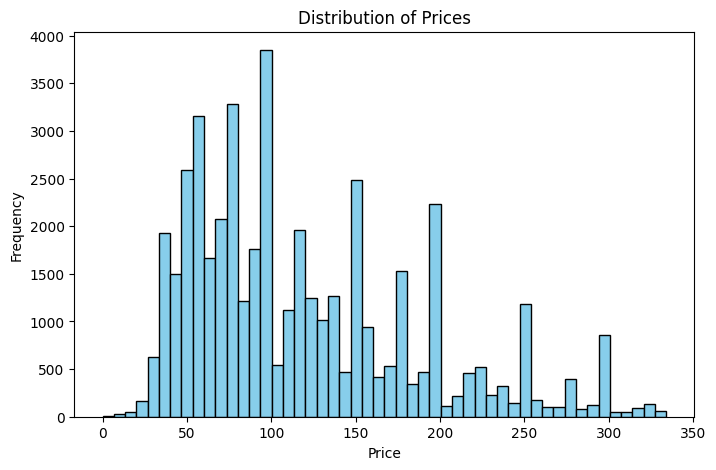

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_clean['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Prices")
plt.show()


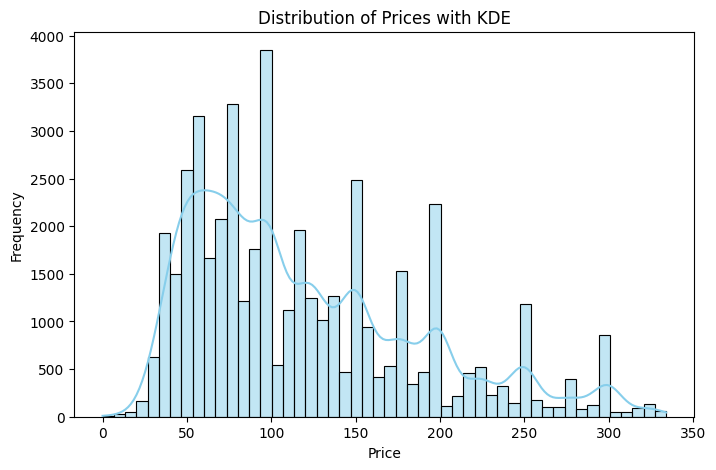

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_clean['price'], bins=50, kde=True, color='skyblue')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Prices with KDE")
plt.show()


/tmp/ipython-input-2769248566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="room_type", y="price", data=df_clean, palette="Set2")


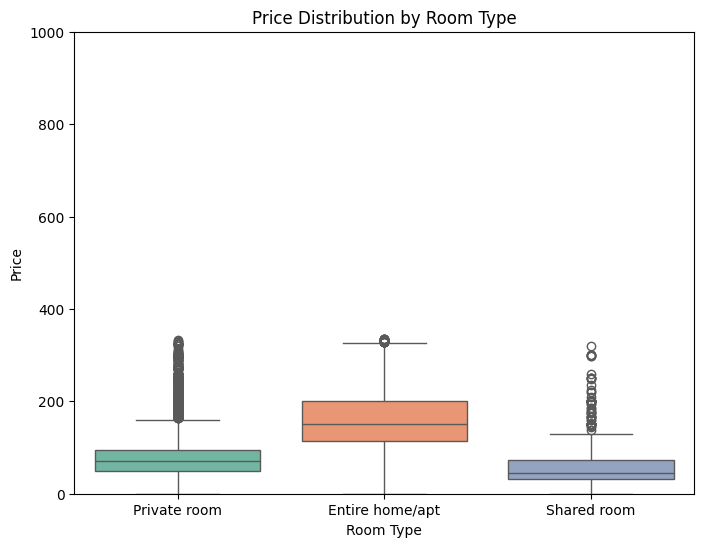

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x="room_type", y="price", data=df_clean, palette="Set2")
plt.ylim(0, 1000)
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()


The typical price is differing between the different types of rooms

# **Problem Statement 3: Sampling and the Central Limit Theorem (CLT)**

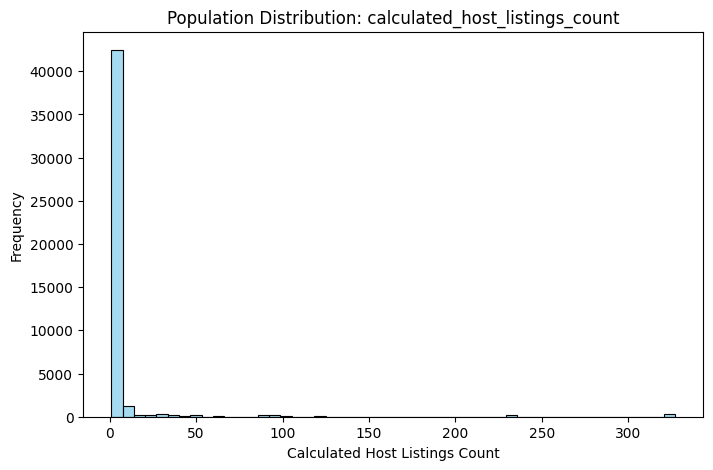

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['calculated_host_listings_count'], bins=50, kde=False, color='skyblue', edgecolor='black')
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Frequency")
plt.title("Population Distribution: calculated_host_listings_count")
plt.show()

In [ ]:
# Calculate population mean
population_mean = df_clean['calculated_host_listings_count'].mean()
print("Population Mean:", population_mean)

Population Mean: 6.64384248262035


**creating a sampling distribution**

In [ ]:
import numpy as np

# List to store sample means
sample_means = []

# Population column from cleaned DataFrame
population = df_clean['calculated_host_listings_count']

# Loop 1000 times
for _ in range(1000):
    # Draw a random sample of size n=50 (with replacement)
    sample = population.sample(n=50, replace=True)

    # Calculate the sample mean
    mean = sample.mean()

    # Store the mean in the list
    sample_means.append(mean)

# Convert to numpy array if needed
sample_means = np.array(sample_means)

# Quick check
print("First 10 sample means:", sample_means[:10])
print("Number of sample means stored:", len(sample_means))

First 10 sample means: [3.8  4.   8.92 1.46 4.66 6.06 2.54 2.54 8.94 2.76]
Number of sample means stored: 1000


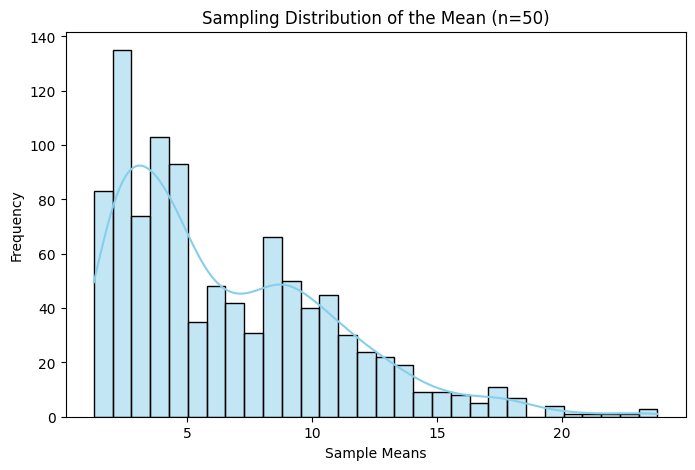

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram of sample means
plt.figure(figsize=(8,5))
sns.histplot(sample_means, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of the Mean (n=50)")
plt.show()

Even if the original population is heavily skewed, the histogram of sample means should look approximately normal (bell-shaped).

This is a visual demonstration of the Central Limit Theorem (CLT).

In [ ]:
# Mean of the sampling distribution
sampling_mean = np.mean(sample_means)

# Original population mean
population_mean = df_clean['calculated_host_listings_count'].mean()

print("Population Mean:", population_mean)
print("Mean of 1000 Sample Means:", sampling_mean)
#The mean of the sample means should be very close to the population mean, confirming the CLT.

Population Mean: 6.64384248262035
Mean of 1000 Sample Means: 6.63782


# **Problem Statement 4: Hypothesis Testing**

In [ ]:
# Prices for Manhattan and Brooklyn
manhattan_prices = df_clean[df_clean['neighbourhood_group'] == 'Manhattan']['price']
brooklyn_prices = df_clean[df_clean['neighbourhood_group'] == 'Brooklyn']['price']

### Hypothesis Testing: Independent Two-Sample t-test

**1. State the Hypotheses:**

*   **Null Hypothesis (H0):** There is no significant difference in the average price of Airbnb listings between Manhattan and Brooklyn. (μ_manhattan = μ_brooklyn)
*   **Alternative Hypothesis (Ha):** There is a significant difference in the average price of Airbnb listings between Manhattan and Brooklyn. (μ_manhattan ≠ μ_brooklyn)

**2. Prepare the Data:** (Already done in the previous step)

We have created two Series: `manhattan_prices` and `brooklyn_prices` containing the prices for each borough from the `df_clean` DataFrame.

**3. Perform the Test:**

In [ ]:
from scipy import stats

# Perform independent two-sample t-test
ttest_result = stats.ttest_ind(manhattan_prices, brooklyn_prices)

# Print the results
print("T-test results:")
print("Test statistic:", ttest_result.statistic)
print("P-value:", ttest_result.pvalue)

T-test results:
Test statistic: 60.20433923793715
P-value: 0.0


**4. Interpret the Results:**

In [ ]:
# Set significance level
alpha = 0.05

# Compare p-value to alpha
if ttest_result.pvalue < alpha:
    print(f"The p-value ({ttest_result.pvalue:.4f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the average price of Airbnb listings between Manhattan and Brooklyn.")
else:
    print(f"The p-value ({ttest_result.pvalue:.4f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the average price of Airbnb listings between Manhattan and Brooklyn.")

The p-value (0.0000) is less than the significance level (0.05).
We reject the null hypothesis.
Conclusion: There is a statistically significant difference in the average price of Airbnb listings between Manhattan and Brooklyn.


# **Problem Statement 5: Advanced Pandas Operations**

In [ ]:
bronx_filtered_bool = df_clean[(df_clean['neighbourhood_group'] == 'Bronx') &
                               (df_clean['price'] < 100) &
                               (df_clean['number_of_reviews'] > 10)]

display(bronx_filtered_bool.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [ ]:
bronx_filtered_query = df_clean.query("neighbourhood_group == 'Bronx' and price < 100 and number_of_reviews > 10")

display(bronx_filtered_query.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [ ]:
grouped_data = df_clean.groupby(['neighbourhood_group', 'room_type']).agg(
    average_price=('price', 'mean'),
    total_reviews=('number_of_reviews', 'sum')
).sort_values(by='average_price', ascending=False)

display(grouped_data)

average_price  total_reviews
neighbourhood_group room_type                                    
Manhattan           Entire home/apt     181.653021         209589
Brooklyn            Entire home/apt     148.219338         256534
Queens              Entire home/apt     131.328388          59646
Staten Island       Entire home/apt     121.089286           5852
Bronx               Entire home/apt     112.298343          11405
Manhattan           Private room         98.065779         207870
                    Shared room          75.939785          10241
Brooklyn            Private room         70.288471         213211
Queens              Private room         65.743207          93301
Staten Island       Private room         62.292553           5670
Bronx               Private room         60.595679          16312
Staten Island       Shared room          57.444444             14
Brooklyn            Shared room          48.036496           5791
Queens              Shared room          46.989691           2724
Bronx               Shared room          45.827586            431

## Vectorized operations

### Subtask:
Created a new categorical column for `availability_365` using a custom function and the `apply()` method.


In [ ]:
def categorize_availability(availability):
    if availability == 0:
        return 'Low'
    elif 1 <= availability <= 180:
        return 'Medium'
    else:
        return 'High'

df_clean['availability_category'] = df_clean['availability_365'].apply(categorize_availability)

display(df_clean.head())

/tmp/ipython-input-2306855709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['availability_category'] = df_clean['availability_365'].apply(categorize_availability)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,High
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Low


In [ ]:
df_clean = df_clean.eval('review_score = (reviews_per_month * number_of_reviews) / (minimum_nights + 1)')
display(df_clean.head())

ValueError: Expression ((reviews_per_month) * (number_of_reviews)) / ((minimum_nights) + (np.float64(1.0))) has forbidden control characters.

In [ ]:
df_clean['review_score'] = (df_clean['reviews_per_month'] * df_clean['number_of_reviews']) / (df_clean['minimum_nights'] + 1)
display(df_clean.head())

/tmp/ipython-input-2483187716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['review_score'] = (df_clean['reviews_per_month'] * df_clean['number_of_reviews']) / (df_clean['minimum_nights'] + 1)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_category,review_score
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,High,0.945000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,High,8.550000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,High,0.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,High,626.400000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Low,0.081818
